# NLP: Delivery 2, Reproduce Results

## Montse Comas, Blai Ras and Fritz Pere Nobbe

## Named Entity Recognition

The objective of this project is to fully understand the structured perceptron algorithm
applied to Named Entity Recognition (NER). NER problems are very useful in many
contexts, from information retrieval to question answering systems. The goal of this project
is not to achieve the best results, but to fully understand all the details about a simple
solution.


# Index

1. [Data loading](#data_lodaing)
2. [Models import](#models)
    1. [Default features](#default)
        1. [Test evaluation](#test_default)
        2. [Train evaluation](#train_default)
        3. [TINY_TEST evaluation](#tiny_default)
    2. [Added features](#added)
        1. [Test evaluation](#test_added)
        2. [Train evaluation](#train_added)
        3. [TINY_TEST evaluation](#tiny_added)

In [1]:
#Imports

%matplotlib inline
%load_ext autoreload
%autoreload 2

#Vector operations and data management
import pandas as pd
import scipy
import numpy as np

#Folder management
import os,sys,inspect

#Importing custom functions
import utils.utils as utils

#Model and other data type saving
import pickle

#Printing styling
import pprint
from IPython.display import display, HTML

#Plot management
import seaborn as sns
import matplotlib.pyplot as plt

#Skseq
import skseq
from skseq.sequences import sequence
from skseq.sequences.sequence import Sequence
from skseq.sequences.sequence_list import SequenceList
from skseq.sequences.label_dictionary import LabelDictionary
import skseq.sequences.structured_perceptron as spc
from skseq.sequences import extended_feature

#Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data Loading <a id='dataloading'></a>

Most of the data we load here is created in `train_models`.

In [2]:
def save(name,file):
    with open(name, "wb") as f:
        pickle.dump(file, f)
def load(name):
    with open(name, 'rb') as f:
        return(pickle.load(f))

Train, test and tiny_set loading

In [3]:
print("Train Set:")
train = pd.read_csv("data/train_data_ner.csv")
display(HTML(train.head().to_html()))

print("Test Set:")
test = pd.read_csv("data/test_data_ner.csv")
display(HTML(test.head().to_html()))

print("TINY_TEST:\n")
TINY_TEST,y_true_tiny = utils.get_tiny_test()
print(TINY_TEST[:2])

Train Set:


,sentence_id,words,tags
0,0,Thousands,O
1,0,of,O
2,0,demonstrators,O
3,0,have,O
4,0,marched,O


Test Set:


,sentence_id,words,tags
0,1,Iranian,B-gpe
1,1,officials,O
2,1,say,O
3,1,they,O
4,1,expect,O


TINY_TEST:

[['The', 'programmers', 'from', 'Barcelona', 'might', 'write', 'a', 'sentence', 'without', 'a', 'spell', 'checker', '.'], ['The', 'programmers', 'from', 'Barchelona', 'cannot', 'write', 'a', 'sentence', 'without', 'a', 'spell', 'checker', '.']]


Train & test divisions loading

In [4]:
X_train = load('fitted_models/X_train.pkl')
y_train = load('fitted_models/y_train.pkl')
X_test = load('fitted_models/X_test.pkl')
y_test = load('fitted_models/y_test.pkl')

Corpus loading

In [5]:
corpus_word_dict, corpus_tag_dict = utils.corpus(X_train, y_train)
print(corpus_tag_dict)

{'O': 0, 'B-geo': 1, 'B-gpe': 2, 'B-tim': 3, 'B-org': 4, 'I-geo': 5, 'B-per': 6, 'I-per': 7, 'I-org': 8, 'B-art': 9, 'I-art': 10, 'I-tim': 11, 'I-gpe': 12, 'B-nat': 13, 'I-nat': 14, 'B-eve': 15, 'I-eve': 16}


Test sequence loading

In [6]:
train_seq = load("fitted_models/train_seq.pkl")
train_seq[1595].to_words(sequence_list = train_seq)

'Honiara/B-geo is/O reported/O to/O be/O quiet/O Saturday/B-tim ,/O with/O Australian/B-gpe troops/O patrolling/O the/O streets/O ./O '

For the evaluate part: 

* `test_tag_pos` is the index of every tag of the test set inside our `corpus_tag_dict` dictionary. Same for `train_tag_pos`.

* y_true, in consequence, is the unnested ``test_tag_pos``, for the sake of calling sklearn metric functions. Same for ``y_true_train``.

In [7]:
test_tag_pos = [[corpus_tag_dict[i] for i in list_y] for list_y in y_test]
y_true = [tag for array in test_tag_pos for tag in array]

train_tag_pos = [[corpus_tag_dict[i] for i in list_y] for list_y in y_train]
y_true_train = [tag for array in train_tag_pos for tag in array]

tiny_tag_pos = [[corpus_tag_dict[i] for i in list_y] for list_y in y_true_tiny]
y_true_tiny = [tag for array in tiny_tag_pos for tag in array]

# Models <a id='models'></a>

## Default features perceptron <a id='default'></a>


Feature building:

In [8]:
feature_mapper = skseq.sequences.id_feature.IDFeatures(train_seq)
# get features
feature_mapper.build_features()
list(feature_mapper.feature_dict)[0:10]

['init_tag:O',
 'id:Thousands::O',
 'id:of::O',
 'prev_tag:O::O',
 'id:demonstrators::O',
 'id:have::O',
 'id:marched::O',
 'id:through::O',
 'id:London::B-geo',
 'prev_tag:O::B-geo']

Model Loading:

In [9]:
sp_default = spc.StructuredPerceptron(corpus_word_dict, corpus_tag_dict, feature_mapper)
sp_default.load_model(dir="fitted_models/01_Default_Features")
sp_default.parameters

array([ 8.6     ,  8.6     , 12.666667, ..., -2.666667,  1.866667,
        0.      ])

### Test Evaluation <a id='test_default'></a>

01. Metrics:


,Correct Sentences,Correct Tags,Weighted F1 Score
0,25.78,25.05,85.79



02. Confusion matrix:


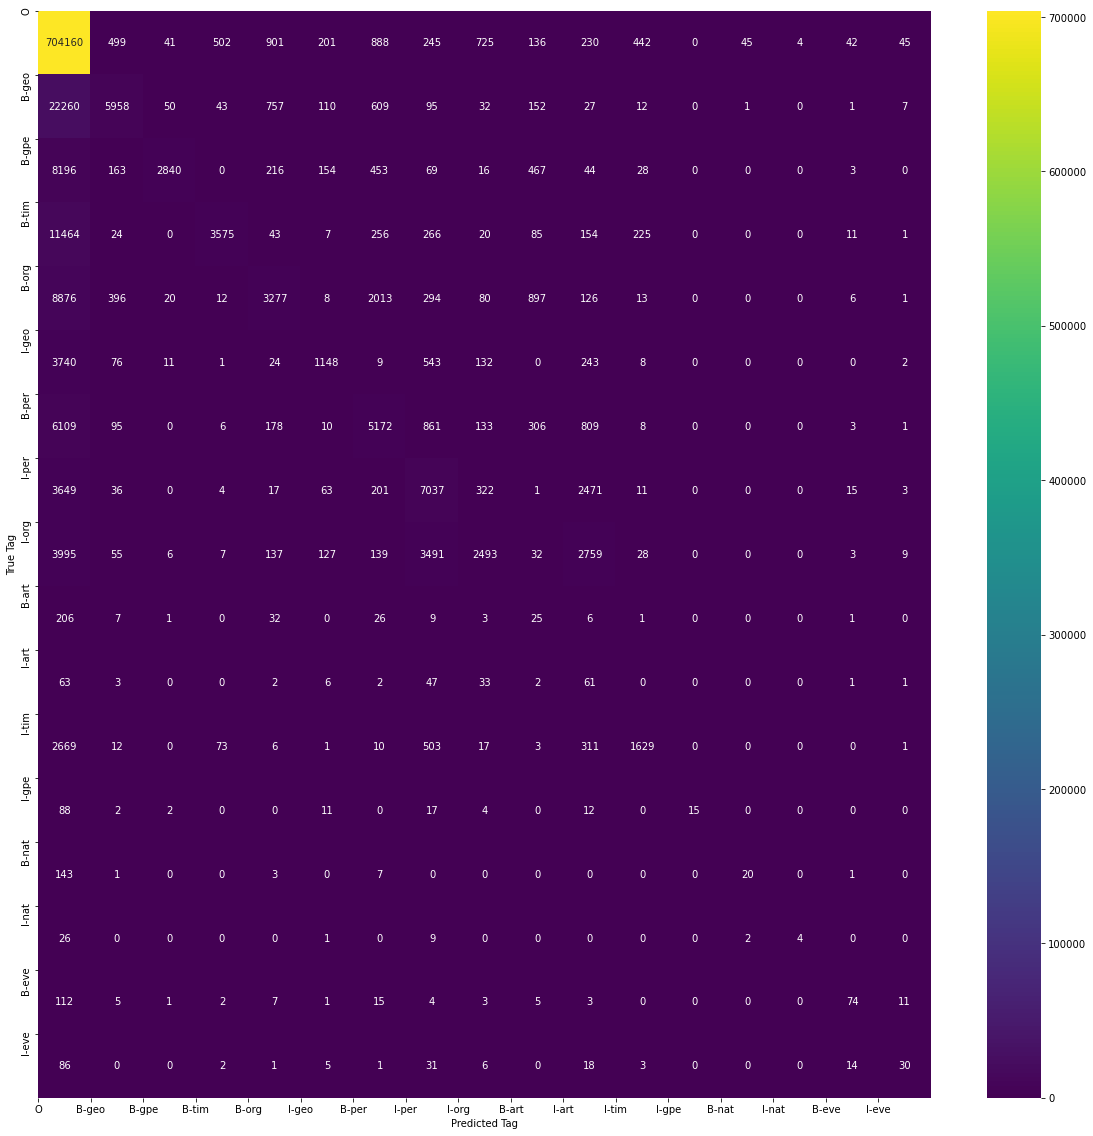


03. Metrics by tag:


,precision,recall,f1-score
O,0.907607,0.993025,0.948397
B-geo,0.812602,0.197848,0.318218
B-gpe,0.955585,0.224524,0.363613
B-tim,0.845753,0.221623,0.351213
B-org,0.585074,0.204570,0.303145
I-geo,0.619536,0.193364,0.294737
B-per,0.527701,0.377766,0.440320
I-per,0.520450,0.508821,0.514570
I-org,0.620304,0.187712,0.288208
B-art,0.011843,0.078864,0.020593


In [10]:
df_default = pd.read_csv("Results/default_features.csv")
_ = utils.evaluate(sp_default,
                   X_test,test_tag_pos,corpus_tag_dict,y_true,
                   save_name="default_features",dataframe = df_default)

### Train Evaluation <a id='train_default'></a>

01. Metrics:


,Correct Sentences,Correct Tags,Weighted F1 Score
0,63.92,80.13,96.82



02. Confusion matrix:


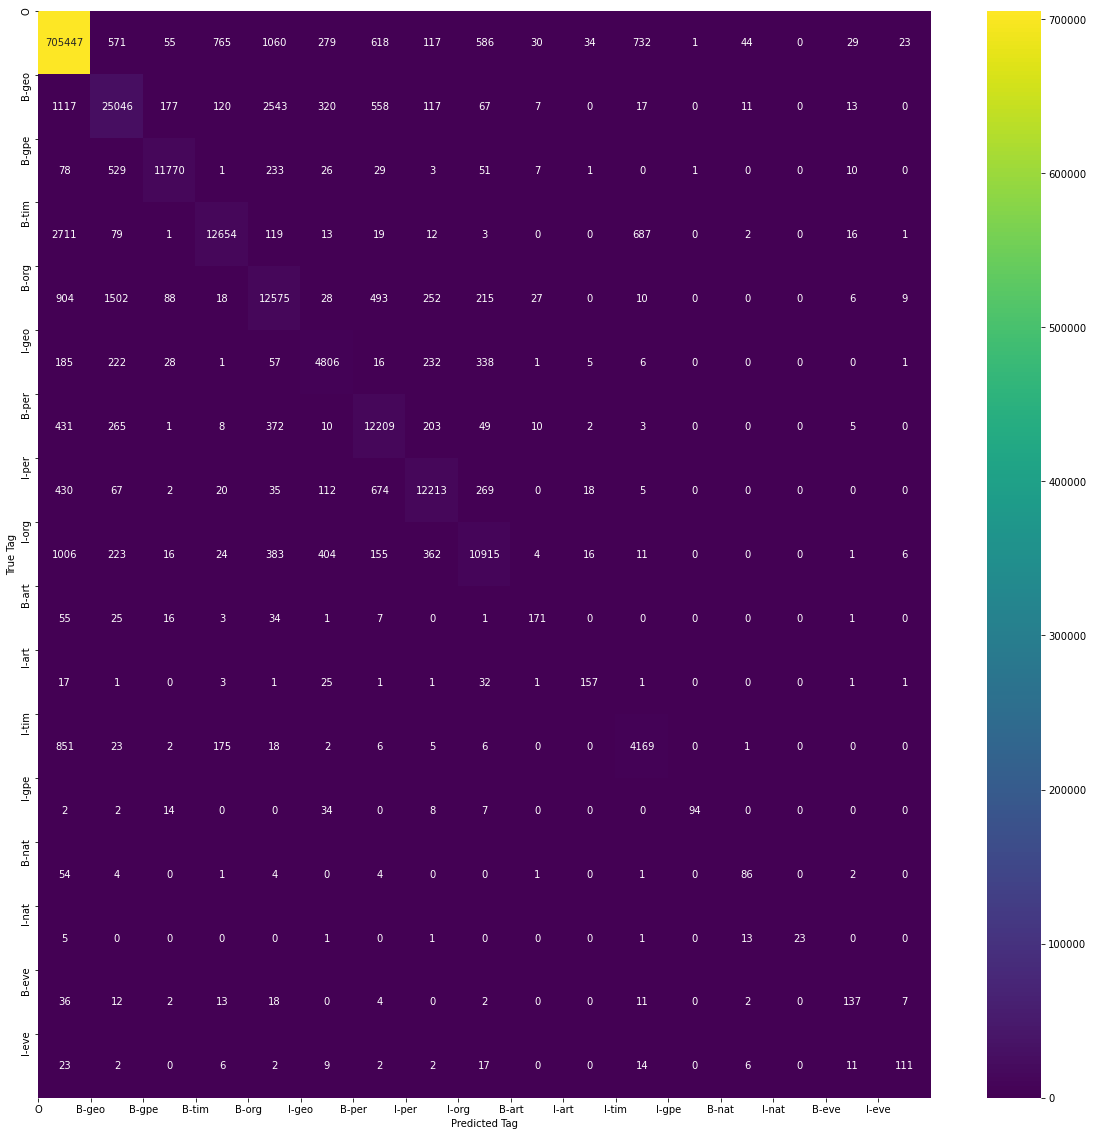


03. Metrics by tag:


,precision,recall,f1-score
O,0.988919,0.993040,0.990975
B-geo,0.876562,0.831734,0.853560
B-gpe,0.966973,0.923934,0.944964
B-tim,0.916160,0.775510,0.839988
B-org,0.720465,0.779748,0.748935
I-geo,0.791763,0.814852,0.803142
B-per,0.825211,0.899838,0.860910
I-per,0.902794,0.882124,0.892339
I-org,0.869167,0.806964,0.836912
B-art,0.660232,0.544586,0.596859


In [11]:
df_default_train = pd.read_csv("Results/default_features_train.csv")
_ = utils.evaluate(sp_default,
                   X_train,train_tag_pos,corpus_tag_dict,y_true_train,
                   save_name="default_features_train",dataframe = df_default_train)

### TINY_TEST Evaluation <a id='tiny_default'></a>

01. Metrics:


,Correct Sentences,Correct Tags,Weighted F1 Score
0,23.08,55.88,89.34



02. Confusion matrix:


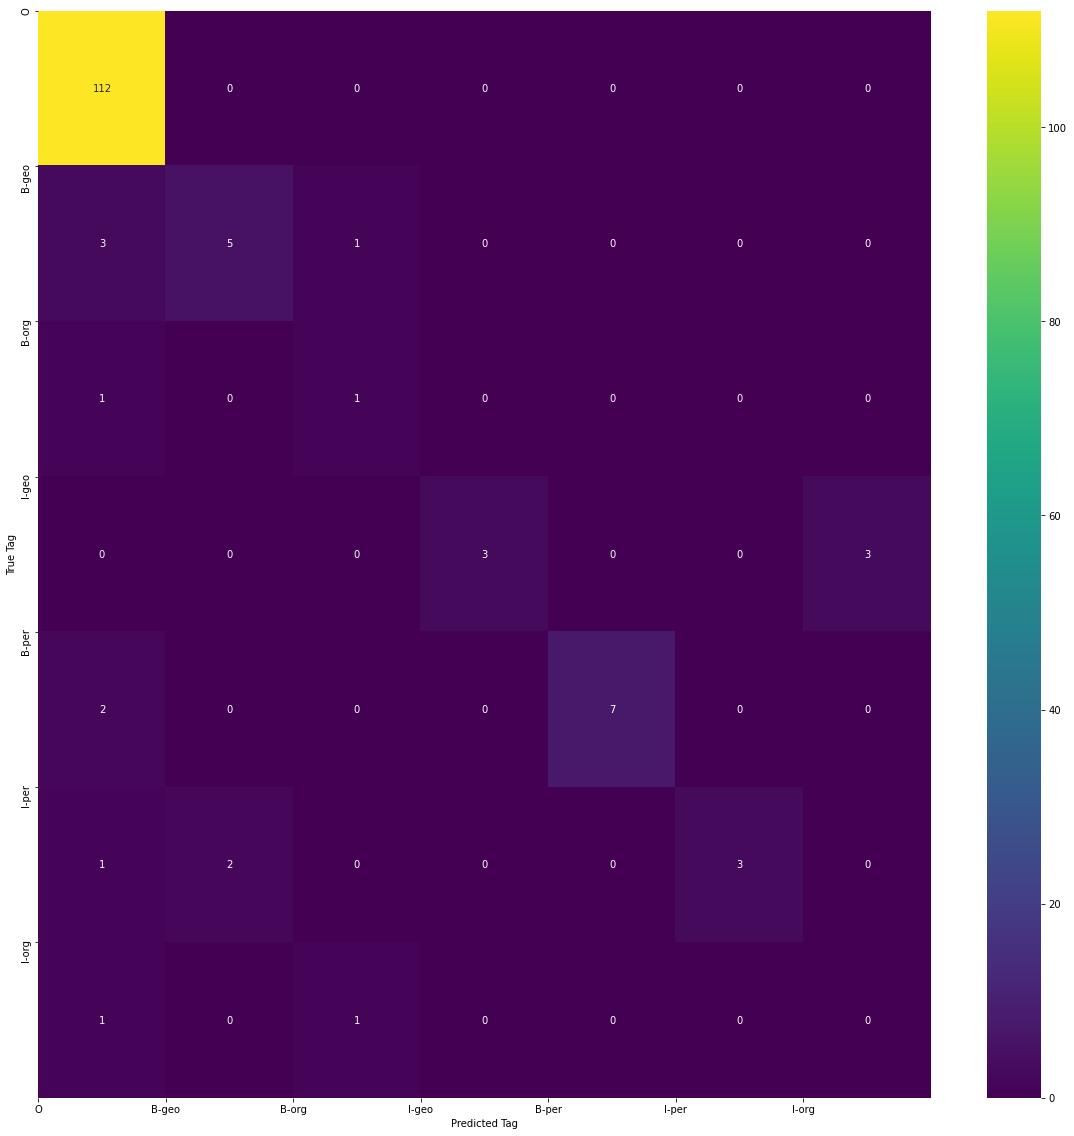


03. Metrics by tag:


,precision,recall,f1-score
O,0.933333,1.000000,0.965517
B-geo,0.714286,0.555556,0.625000
B-org,0.333333,0.500000,0.400000
I-geo,1.000000,0.500000,0.666667
B-per,1.000000,0.777778,0.875000
I-per,1.000000,0.500000,0.666667
I-org,0.000000,0.000000,0.000000
accuracy,0.897260,0.897260,0.897260
macro avg,0.711565,0.547619,0.599836
weighted avg,0.908415,0.897260,0.893410


In [12]:
#It takes less than a second, so no need previously import the dataset with the metrics result, etc.
_ = utils.evaluate(sp_default,
                   TINY_TEST,tiny_tag_pos,corpus_tag_dict,y_true_tiny,
                   save_name="default_features_tiny",dataframe = None)

In [13]:
for sentence in TINY_TEST:
    print(sp_default.viterbi_decode(
        Sequence(x=sentence, y=[int(0) for w in sentence]))[0].to_words(
        train_seq, only_tag_translation=True),"\n")

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

Jack/B-per London/B-geo went/O to/O Parris/O ./O  

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O  

Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O  

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/O would/O become/O such/O a/O big/O company/O ./O  

The/O president/O of/O U.S.A/O though/O they/O could/O win/O the/O war/O ./O  

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org though/O they/O could/O win/O the/O war/O ./O  

The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O  

Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O  

Apple/O is/O a/O great/O company/O ./O  

I/O r

## Added features perceptron <a id='added'></a>

Feature building:

In [14]:
added_feature_mapper = skseq.sequences.extended_feature.ExtendedFeatures(train_seq) 
# get features
added_feature_mapper.build_features()

added = ["capi","point","ending","prep"]
for index,feat_type in enumerate(added):
    print(str(index)+". "+feat_type,end="\n")
    print([feature for feature in list(added_feature_mapper.feature_dict.keys()) if feat_type in feature],end="\n\n")

0. capi
['capi_ini::O', 'capi_ini::B-geo', 'capi_ini::B-gpe', 'capi_ini::B-tim', 'capi_ini::B-org', 'capi_ini::I-geo', 'capi_any::B-geo', 'capi_ini::B-per', 'capi_ini::I-per', 'capi_any::O', 'capi_ini::I-org', 'capi_ini::B-art', 'capi_any::B-art', 'capi_ini::I-art', 'id:capital::O', 'capi_any::B-org', 'capi_any::I-tim', 'capi_any::I-org', 'capi_any::B-tim', 'capi_ini::I-tim', 'id:capita::O', 'capi_any::B-per', 'capi_ini::I-gpe', 'capi_any::B-gpe', 'capi_any::I-per', 'capi_ini::B-nat', 'capi_ini::I-nat', 'capi_ini::B-eve', 'capi_ini::I-eve', 'capi_any::B-nat', 'capi_any::I-art', 'capi_any::I-geo', 'capi_any::B-eve', 'id:capitals::O', 'id:capitalize::O', 'id:decapitated::O', 'capi_any::I-eve', 'id:capitalist::O', 'id:capital-intensive::O', 'id:landscaping::O', 'id:per-capita::O', 'id:capitalization::O', 'id:capitalized::O', 'id:escaping::O', 'capi_any::I-gpe', 'id:capitalism::O', 'capi_any::I-nat', 'id:anti-capitalist::O', 'id:capitol::O']

1. point
['inside_point::O', 'inside_point::B-g

In [15]:
sp_added = spc.StructuredPerceptron(corpus_word_dict, corpus_tag_dict, added_feature_mapper)
sp_added.load_model(dir="fitted_models/02_Added_Features.pkl")
sp_added.parameters

array([ 20.066667,  11.533333, -17.6     , ..., -11.933333,   0.733333,
         0.      ])

### Test Evaluation <a id='test_added'></a>

01. Metrics:


,Correct Sentences,Correct Tags,Weighted F1 Score
0,25.93,35.13,89.28



02. Confusion matrix:


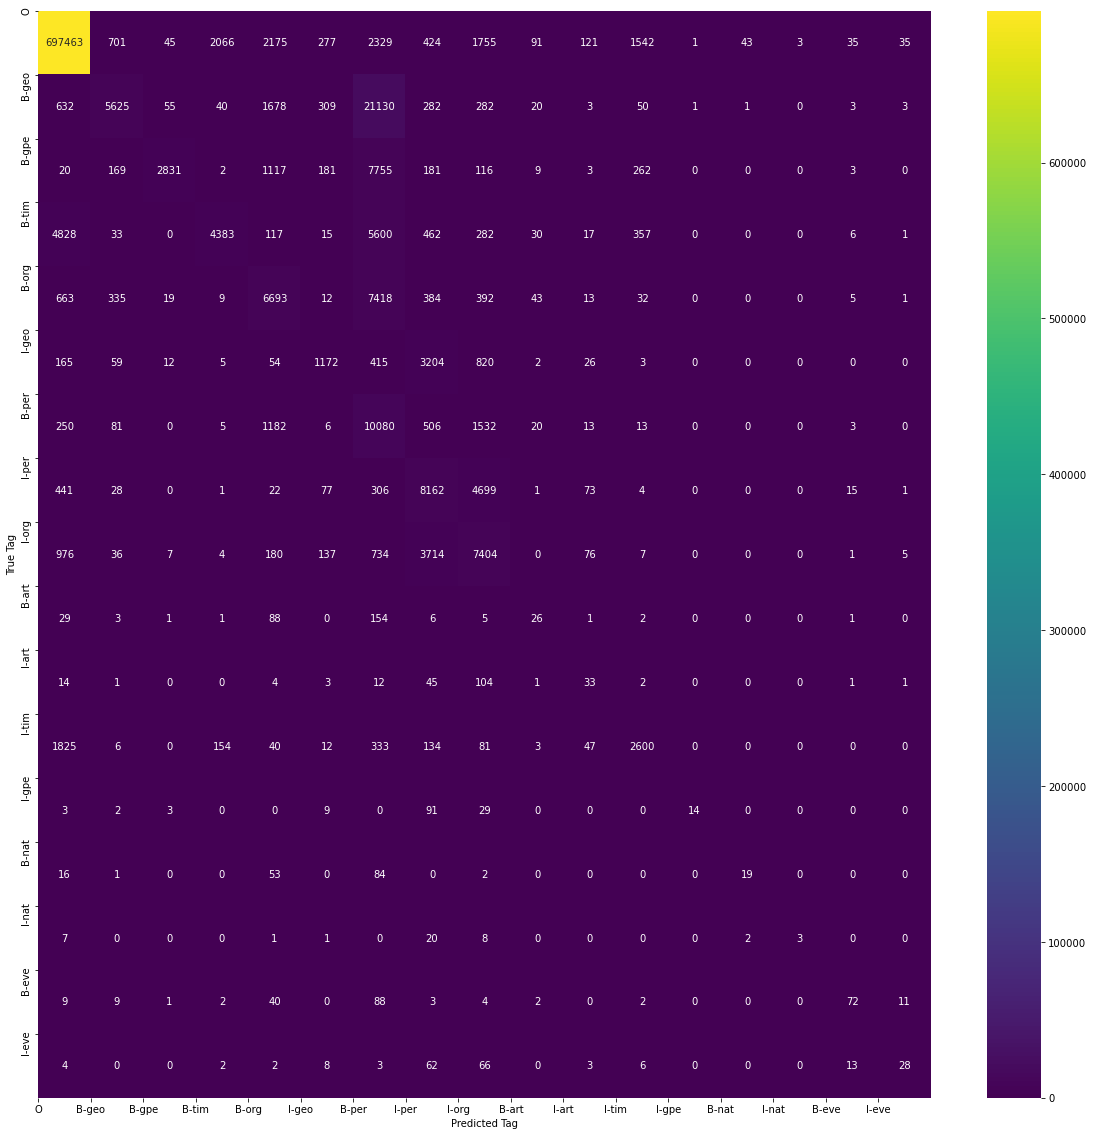


03. Metrics by tag:


,precision,recall,f1-score
O,0.986029,0.983581,0.984804
B-geo,0.793483,0.186790,0.302395
B-gpe,0.951917,0.223812,0.362414
B-tim,0.656728,0.271713,0.384389
B-org,0.497769,0.417816,0.454302
I-geo,0.528166,0.197406,0.287396
B-per,0.178594,0.736250,0.287458
I-per,0.461652,0.590166,0.518058
I-org,0.421136,0.557488,0.479813
B-art,0.104839,0.082019,0.092035


In [16]:
df_added = pd.read_csv("Results/added_features.csv")
_ = utils.evaluate(sp_added,
                   X_test,test_tag_pos,corpus_tag_dict,y_true,
                   save_name="added_features",dataframe = df_added)

### Train Evaluation <a id='train_added'></a>

01. Metrics:


,Correct Sentences,Correct Tags,Weighted F1 Score
0,57.68,77.42,96.36



02. Confusion matrix:


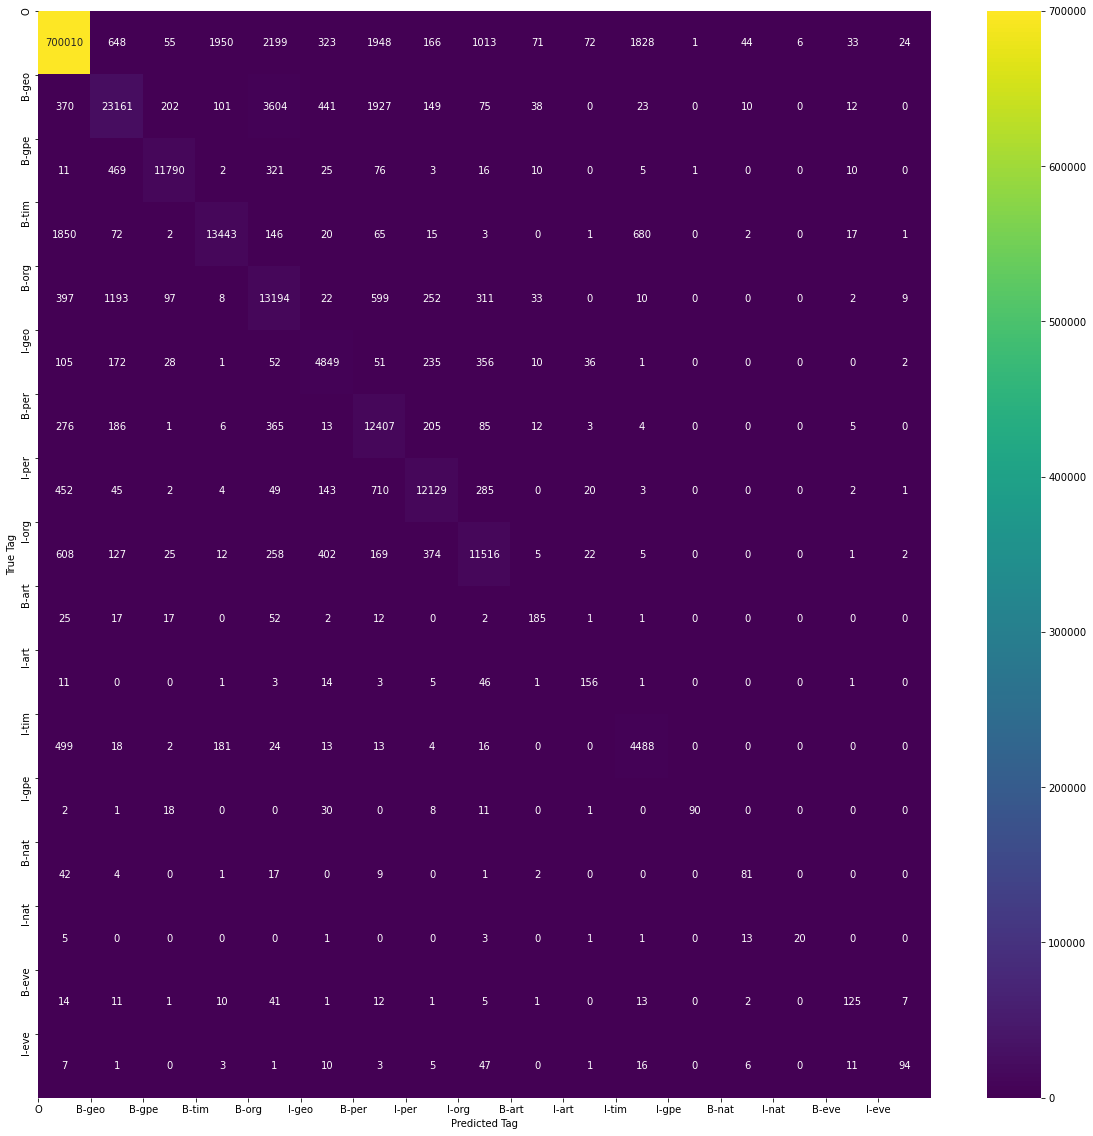


03. Metrics by tag:


,precision,recall,f1-score
O,0.993367,0.985387,0.989361
B-geo,0.886545,0.769136,0.823678
B-gpe,0.963235,0.925504,0.943993
B-tim,0.854990,0.823865,0.839139
B-org,0.649119,0.818131,0.723891
I-geo,0.768585,0.822143,0.794462
B-per,0.689125,0.914431,0.785950
I-per,0.895063,0.876056,0.885458
I-org,0.835037,0.851397,0.843138
B-art,0.502717,0.589172,0.542522


In [22]:
df_added_train = pd.read_csv("Results/added_features_train.csv")
_ = utils.evaluate(sp_added,
                   X_train,train_tag_pos,corpus_tag_dict,y_true_train,
                   save_name="added_features_train",dataframe = df_added_train)

### TINY_TEST Evaluation <a id='tiny_added'></a>

In [18]:
corpus_tag_dict

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-tim': 3,
 'B-org': 4,
 'I-geo': 5,
 'B-per': 6,
 'I-per': 7,
 'I-org': 8,
 'B-art': 9,
 'I-art': 10,
 'I-tim': 11,
 'I-gpe': 12,
 'B-nat': 13,
 'I-nat': 14,
 'B-eve': 15,
 'I-eve': 16}

01. Metrics:


,Correct Sentences,Correct Tags,Weighted F1 Score
0,30.77,58.82,89.14



02. Confusion matrix:


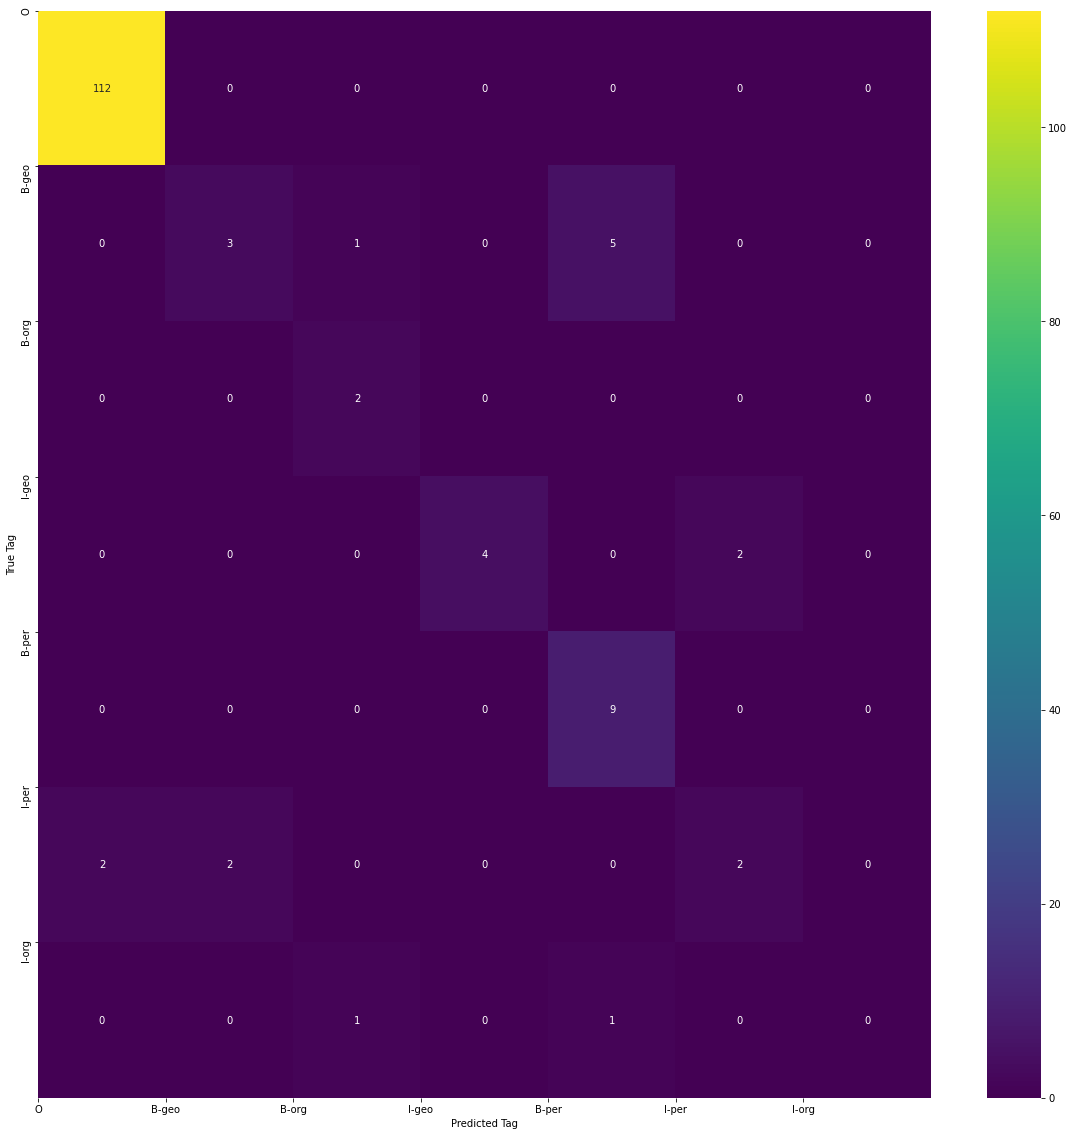


03. Metrics by tag:


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score
O,0.982456,1.000000,0.991150
B-geo,0.600000,0.333333,0.428571
B-org,0.500000,1.000000,0.666667
I-geo,1.000000,0.666667,0.800000
B-per,0.600000,1.000000,0.750000
I-per,0.500000,0.333333,0.400000
I-org,0.000000,0.000000,0.000000
accuracy,0.904110,0.904110,0.904110
macro avg,0.597494,0.619048,0.576627
weighted avg,0.896131,0.904110,0.891434


In [19]:
#It takes less than a second, so no need previously import the dataset with the metrics result, etc.
_ = utils.evaluate(sp_added,
                   TINY_TEST,tiny_tag_pos,corpus_tag_dict,y_true_tiny,
                   save_name="added_features_tiny",dataframe = None)

In [21]:
for sentence in TINY_TEST:
    print(sp_added.viterbi_decode(
        Sequence(x=sentence, y=[int(0) for w in sentence]))[0].to_words(
        train_seq, only_tag_translation=True),"\n")

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

Jack/B-per London/B-geo went/O to/O Parris/B-per ./O  

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O  

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O though/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O  

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O though/O Microsof/B-per would/O become/O such/O a/O big/O company/O ./O  

The/O president/O of/O U.S.A/B-per though/O they/O could/O win/O the/O war/O ./O  

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo though/O they/O could/O win/O the/O war/O ./O  

The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control/O ./O  

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-per Arabia/I-per ./O  

Apple/B-org is/O a/O great/O co